# HW2 Comparision of Simple Backpropagation, Vanilla RNN, LSTM and GRU

# Part 1 - Data Preprocessing

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
dataset_train.shape

(1258, 6)

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
# one time step will capture every info and end up overfitting, 20-40 is not enough, 60 is a optimal number of timesteps
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train_nn,y_train_nn=X_train, y_train

In [10]:
X_train_nn.shape

(1198, 60)

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape

(1198, 60, 1)

# Part 2 - Building the RNN

In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,SimpleRNN,GRU
from keras.layers import Dropout
from keras.optimizers import Adam

In [0]:
import tensorflow.compat.v1 as tf
from tensorflow.python.util import deprecation # ignore tensorflow deprecation warnings
deprecation._PRINT_DEPRECATION_WARNINGS = False

## 2.0 NN with Backpropagation

In [0]:
# define the keras model
model = Sequential()
model.add(Dense(120, input_dim=60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# compile the keras model
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.002), metrics=['accuracy'])

In [31]:
# fit the keras model on the dataset
hist_nn = model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=32)
hist_nn

Epoch 1/100
1198/1198 [==============================] - 0s 114us/step - loss: 2.6480e-04 - acc: 0.0017
Epoch 2/100
1198/1198 [==============================] - 0s 105us/step - loss: 2.8809e-04 - acc: 0.0017
Epoch 3/100
1198/1198 [==============================] - 0s 112us/step - loss: 3.2319e-04 - acc: 0.0017
Epoch 4/100
1198/1198 [==============================] - 0s 107us/step - loss: 2.7074e-04 - acc: 0.0017
Epoch 5/100
1198/1198 [==============================] - 0s 130us/step - loss: 2.8071e-04 - acc: 0.0017
Epoch 6/100
1198/1198 [==============================] - 0s 112us/step - loss: 3.1319e-04 - acc: 0.0017
Epoch 7/100
1198/1198 [==============================] - 0s 120us/step - loss: 2.7602e-04 - acc: 0.0017
Epoch 8/100
1198/1198 [==============================] - 0s 117us/step - loss: 3.3322e-04 - acc: 0.0017
Epoch 9/100
1198/1198 [==============================] - 0s 120us/step - loss: 3.3164e-04 - acc: 0.0017
Epoch 10/100
1198/1198 [==============================] - 0s 111

In [0]:
loss_nn = hist_nn.history['loss']

## 2.1 Simple RNN

In [33]:
# Initialising the RNN
regressor_rnn = Sequential()
# Adding the first SimpleRNN layer and some Dropout regularisation
regressor_rnn.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor_rnn.add(Dropout(0.2))
# Adding a second SimpleRNN layer and some Dropout regularisation
regressor_rnn.add(SimpleRNN(units = 50, return_sequences = True))
regressor_rnn.add(Dropout(0.2))
# Adding a third SimpleRNN layer and some Dropout regularisation
regressor_rnn.add(SimpleRNN(units = 50, return_sequences = True))
regressor_rnn.add(Dropout(0.2))
# Adding a fourth SimpleRNN layer and some Dropout regularisation
regressor_rnn.add(SimpleRNN(units = 50))
regressor_rnn.add(Dropout(0.2))
# Adding the output layer
regressor_rnn.add(Dense(units = 1))
# Compiling the RNN
regressor_rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
hist_rnn=regressor_rnn.fit(X_train, y_train, epochs = 100, batch_size = 32)
hist_rnn


Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.4281
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.2549
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.1846
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.1460
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.1142
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0883
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0823
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0615
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0491
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0457
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0400
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

In [0]:
loss_rnn = hist_rnn.history['loss']

## 2.2 LSTM

In [35]:
# Initialising the RNN
regressor_lstm = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor_lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor_lstm.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor_lstm.add(LSTM(units = 50, return_sequences = True))
regressor_lstm.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor_lstm.add(LSTM(units = 50, return_sequences = True))
regressor_lstm.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor_lstm.add(LSTM(units = 50))
regressor_lstm.add(Dropout(0.2))
# Adding the output layer
regressor_lstm.add(Dense(units = 1))
# Compiling the RNN
regressor_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
hist_lstm = regressor_lstm.fit(X_train, y_train, epochs = 100, batch_size = 32)
hist_lstm

Epoch 1/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0612
Epoch 2/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0058
Epoch 5/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [============================

In [0]:
loss_lstm = hist_lstm.history['loss']

## 2.3 GRU

In [37]:
# Initialising the GRU
regressor_gru = Sequential()
# Adding the first GRU layer and some Dropout regularisation
regressor_gru.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor_gru.add(Dropout(0.2))
# Adding a second GRU layer and some Dropout regularisation
regressor_gru.add(GRU(units = 50, return_sequences = True))
regressor_gru.add(Dropout(0.2))
# Adding a third GRU layer and some Dropout regularisation
regressor_gru.add(GRU(units = 50, return_sequences = True))
regressor_gru.add(Dropout(0.2))
# Adding a fourth GRU layer and some Dropout regularisation
regressor_gru.add(GRU(units = 50))
regressor_gru.add(Dropout(0.2))
# Adding the output layer
regressor_gru.add(Dense(units = 1))
# Compiling the GRU
regressor_gru.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the GRU to the Training set
hist_gru = regressor_gru.fit(X_train, y_train, epochs = 100, batch_size = 32)
hist_gru

Epoch 1/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0482
Epoch 2/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0035
Epoch 11/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0031
Epoch 12/100
1198/1198 [============================

In [0]:
loss_gru = hist_gru.history['loss']

# Part 3 - Model comparison

Text(0.5, 1.0, 'RNN')

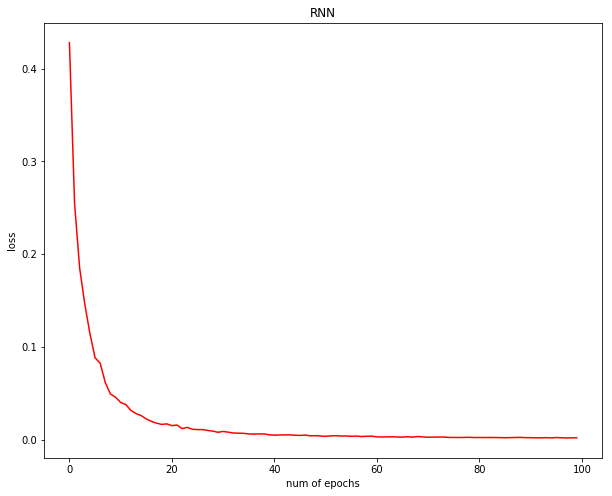

In [44]:
plt.figure(1,figsize= (10,8))
plt.plot(loss_rnn,color='red',label = 'rnn')
plt.xlabel("num of epochs")
plt.ylabel("loss")
plt.title('RNN')

Text(0.5, 1.0, 'LSTM')

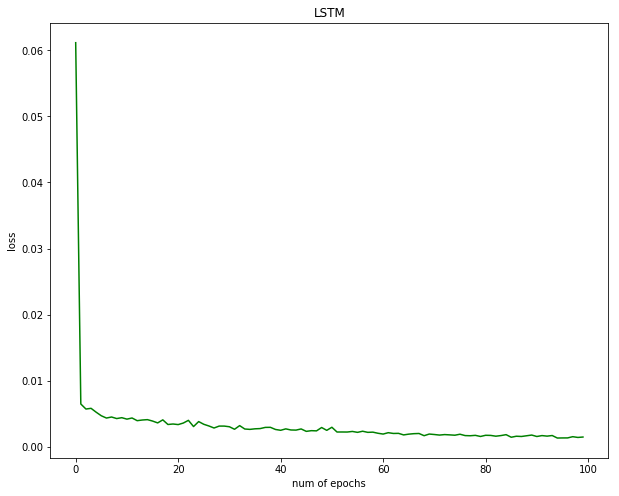

In [45]:
plt.figure(1,figsize= (10,8))
plt.plot(loss_lstm,color='green',label = 'lstm')
plt.xlabel("num of epochs")
plt.ylabel("loss")
plt.title('LSTM')

Text(0.5, 1.0, 'GRU')

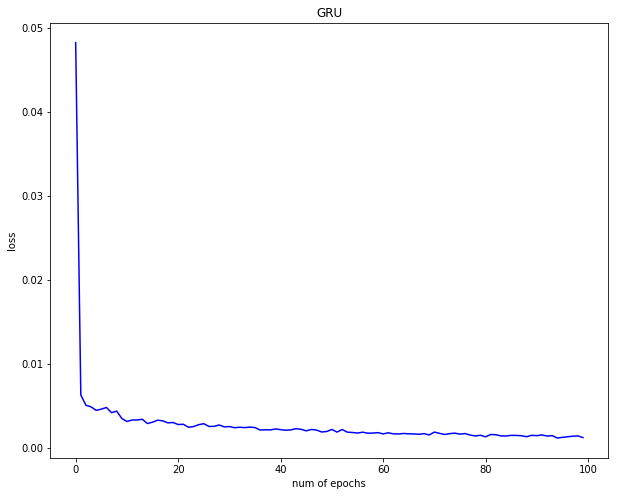

In [46]:
plt.figure(1,figsize= (10,8))
plt.plot(loss_gru,color='blue',label = 'gru')
plt.xlabel("num of epochs")
plt.ylabel("loss")
plt.title('GRU')

# Part 4 - Making the predictions and visualising the results

In [0]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])


In [0]:
X_test = np.array(X_test)

In [0]:
X_test_nn = X_test

In [51]:
X_test_nn.shape

(20, 60)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [53]:
X_test.shape

(20, 60, 1)

In [0]:
predicted_stock_price_nn = model.predict(X_test_nn)
predicted_stock_price_nn = sc.inverse_transform(predicted_stock_price_nn)

In [0]:
predicted_stock_price_rnn = regressor_rnn.predict(X_test)
predicted_stock_price_rnn = sc.inverse_transform(predicted_stock_price_rnn)

In [0]:
predicted_stock_price_lstm = regressor_lstm.predict(X_test)
predicted_stock_price_lstm = sc.inverse_transform(predicted_stock_price_lstm)

In [0]:
predicted_stock_price_gru = regressor_gru.predict(X_test)
predicted_stock_price_gru = sc.inverse_transform(predicted_stock_price_gru)

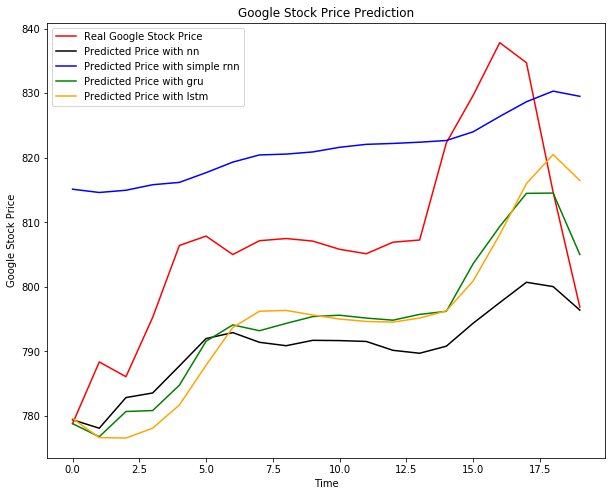

In [59]:
# Visualising the results
plt.figure(figsize = (10,8))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_nn, color = 'black', label = 'Predicted Price with nn')
plt.plot(predicted_stock_price_rnn, color = 'blue', label = 'Predicted Price with simple rnn')
plt.plot(predicted_stock_price_gru, color = 'green', label = 'Predicted Price with gru')
plt.plot(predicted_stock_price_lstm, color = 'orange', label = 'Predicted Price with lstm')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Part 5 - Conclusion

- Comparing with the time of training, simple backpropagation has the least time comsumption,which is less than 5s. Vanilla neural network takes 600s to train the model.LSTM spend 1700s to train the model. GRU spend 1400s to train the model. Therefore the train time for 4 models: LSTM > GRU > RNN > Backpropagation.
- For the computational efforts, to reach the same loss (0.002), vanilla rnn takes 86 epoach, LSTM takes 63 epoachs and GRU takes 46 epoach. Thus, GRU takes the least epoach to get the same performance with the other models.
- From the plot showed on part 4, it can be seen that for prediction GRU performs the best, it not only catch the trend but also most close to the true value.
- Therefore, it can be concluded that comparing with the 4 models above, although GRU is not the quickest algorithem, it can reach a low loss quicker and more likely to catch the trend and get close to the true value.